In [74]:
import requests
import bs4
import json
import datetime as dt
import sys
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
Lisbon_Properties = pd.read_csv(r'C:\Users\rgpoi\OneDrive\Ambiente de Trabalho\Ficheiros_Projeto_Python\Lisbon_Properties.csv', index_col=0)
Lisbon_Properties

,Title,Price,N_Rooms,Total_Area,Latitude,Longitude,Region,extras,Type,Typology,...,Apartamento.1,Casa.1,Duplex.1,Estúdio.1,Flat.1,Loft.1,Moradia.1,Palacete.1,Penthouse.1,Quinta.1
id,,,,,,,,,,,,,,,,,,,,,
0,"Apartamento T2 em Alvalade, Lisboa",430000,2,Área bruta 90 m²,38.75,-9.14,Alvalade,,Apartamento,T2,...,1,0,0,0,0,0,0,0,0,0
1,"Apartamento T1 em Benfica, Lisboa",269900,1,Área bruta 97 m²,38.75,-9.20,Benfica,,Apartamento,T1,...,1,0,0,0,0,0,0,0,0,0
2,"Apartamento T3 na Rua António Nobre, São Domin...",399900,3,Área bruta 120 m²,38.75,-9.18,São_Domingos_de_Benfica,,Apartamento,T3,...,1,0,0,0,0,0,0,0,0,0
3,"Apartamento T5 na Rua Sousa Pinto, Santo Antón...",3950000,5,Área bruta 416 m²,38.72,-9.16,Santo_António,"De luxo, Com garagem",Apartamento,T5,...,1,0,0,0,0,0,0,0,0,0
4,"Apartamento T4+1 na Rua de São Paulo, Misericó...",1650000,4,Área útil 233 m²,38.71,-9.14,Misericórdia,"Com elevador, Com garagem",Apartamento,T4+1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,"Apartamento T2 na Rua Nova do Loureiro, Miseri...",730200,2,Área bruta 77 m²,38.71,-9.15,Misericórdia,,Apartamento,T2,...,1,0,0,0,0,0,0,0,0,0
1345,"Apartamento T2 na Rua Joaquim Casimiro, Estrel...",479000,2,Área bruta 80 m²,38.71,-9.17,Estrela,,Apartamento,T2,...,1,0,0,0,0,0,0,0,0,0
1346,"Apartamento T3 em São Domingos de Benfica, Lisboa",429900,3,Área bruta 72 m²,38.74,-9.18,São_Domingos_de_Benfica,"Com elevador, Com garagem",Apartamento,T3,...,1,0,0,0,0,0,0,0,0,0


In [76]:
Lisbon_Properties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1243 entries, 0 to 1348
Data columns (total 93 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      1243 non-null   object 
 1   Price                      1243 non-null   int64  
 2   N_Rooms                    1243 non-null   int64  
 3   Total_Area                 1243 non-null   object 
 4   Latitude                   1243 non-null   float64
 5   Longitude                  1243 non-null   float64
 6   Region                     1243 non-null   object 
 7   extras                     1243 non-null   object 
 8   Type                       1243 non-null   object 
 9   Typology                   1243 non-null   object 
 10  Extra_Rooms                1243 non-null   int64  
 11  Extra_Rooms_Flag           1243 non-null   int64  
 12  Total_N_Rooms              1243 non-null   int64  
 13  Area_m2                    1243 non-null   int64  
 1

In [77]:
Lisbon_Properties['Total_N_Rooms'].value_counts()

Total_N_Rooms
2     403
3     303
1     282
4     146
0      53
5      30
9      10
7       7
6       6
8       1
10      1
11      1
Name: count, dtype: int64

In [78]:
Lisbon_Properties['Total_Area'].unique()

array(['Área bruta 90 m²', 'Área bruta 97 m²', 'Área bruta 120 m²',
       'Área bruta 416 m²', 'Área útil 233 m²', 'Área bruta 234 m²',
       'Área bruta 55 m²', 'Área bruta 93 m²', 'Área bruta 290 m²',
       'Área bruta 262 m²', 'Área bruta 874 m²', 'Área bruta 60 m²',
       'Área bruta 336 m²', 'Área bruta 264 m²', 'Área bruta 135 m²',
       'Área útil 88 m²', 'Área bruta 48 m²', 'Área bruta 68 m²',
       'Área bruta 150 m²', 'Área bruta 102 m²', 'Área bruta 67 m²',
       'Área útil 139 m²', 'Área bruta 168 m²', 'Área bruta 191 m²',
       'Área bruta 138 m²', 'Área bruta 44 m²', 'Área bruta 70 m²',
       'Área bruta 49 m²', 'Área bruta 74 m²', 'Área bruta 54 m²',
       'Área bruta 230 m²', 'Área bruta 134 m²', 'Área bruta 119 m²',
       'Área útil 140 m²', 'Área bruta 160 m²', 'Área bruta 130 m²',
       'Área bruta 198 m²', 'Área bruta 76 m²', 'Área bruta 302 m²',
       'Área bruta 180 m²', 'Área bruta 426 m²', 'Área bruta 85 m²',
       'Área bruta 28 m²', 'Área bruta 2

In [79]:
Lisbon_Properties.head()

,Title,Price,N_Rooms,Total_Area,Latitude,Longitude,Region,extras,Type,Typology,...,Apartamento.1,Casa.1,Duplex.1,Estúdio.1,Flat.1,Loft.1,Moradia.1,Palacete.1,Penthouse.1,Quinta.1
id,,,,,,,,,,,,,,,,,,,,,
0,"Apartamento T2 em Alvalade, Lisboa",430000,2,Área bruta 90 m²,38.75,-9.14,Alvalade,,Apartamento,T2,...,1,0,0,0,0,0,0,0,0,0
1,"Apartamento T1 em Benfica, Lisboa",269900,1,Área bruta 97 m²,38.75,-9.20,Benfica,,Apartamento,T1,...,1,0,0,0,0,0,0,0,0,0
2,"Apartamento T3 na Rua António Nobre, São Domin...",399900,3,Área bruta 120 m²,38.75,-9.18,São_Domingos_de_Benfica,,Apartamento,T3,...,1,0,0,0,0,0,0,0,0,0
3,"Apartamento T5 na Rua Sousa Pinto, Santo Antón...",3950000,5,Área bruta 416 m²,38.72,-9.16,Santo_António,"De luxo, Com garagem",Apartamento,T5,...,1,0,0,0,0,0,0,0,0,0
4,"Apartamento T4+1 na Rua de São Paulo, Misericó...",1650000,4,Área útil 233 m²,38.71,-9.14,Misericórdia,"Com elevador, Com garagem",Apartamento,T4+1,...,1,0,0,0,0,0,0,0,0,0


In [80]:
def extra_rooms(x):
    if '+' in x:
        return int(x.split('+')[1])
    else:
        return 0

def area(x):
    if 'Área' in x:
        return int(x.split()[2].replace('.',''))
    else:
        return 'Unknown'

def num_extras(x):
    if x.isspace():
        return 0
    elif ',' in x:
        return int(len(x.split(',')))
    else:
        return 1

In [81]:
extras_df = Lisbon_Properties['extras'].str.split(',', expand=True)
extras_df

,0,1,2,3,4
id,,,,,
0,,None,None,None,None
1,,None,None,None,None
2,,None,None,None,None
3,De luxo,Com garagem,None,None,None
4,Com elevador,Com garagem,None,None,None
...,...,...,...,...,...
1344,,None,None,None,None
1345,,None,None,None,None
1346,Com elevador,Com garagem,None,None,None


In [82]:
extras_df = Lisbon_Properties['extras'].str.split(',', expand=True)

extras = []
unique_extras = []

for x in [0,1,2,3,4]:
    extras.append(list(extras_df[x].unique()))

for ext in extras:
    unique_extras += ext

unique_extras = set(unique_extras)
unique_extras = {extra.strip() for extra in unique_extras if extra is not None and extra.strip()}

In [83]:
for feature in unique_extras:
    Lisbon_Properties[feature] = Lisbon_Properties['extras'].apply(lambda x: int(feature in x))

In [84]:
#columns_to_drop = ['title', 'price', 'num_rooms', 'total_area', 'latitude', 'longitude', 'Typology','extras']
#Lisbon_Properties = Lisbon_Properties.drop(columns_to_drop, axis=1)

In [85]:
region_dummies = pd.get_dummies(Lisbon_Properties['Region'],dtype=int)
type_dummies = pd.get_dummies(Lisbon_Properties['Type'],dtype=int)

In [86]:
Lisbon_Properties = pd.concat([Lisbon_Properties, region_dummies, type_dummies], axis=1)

In [87]:
Lisbon_Properties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1243 entries, 0 to 1348
Columns: 134 entries, Title to Quinta
dtypes: float64(2), int32(35), int64(91), object(6)
memory usage: 1.1+ MB


In [88]:
selected_columns = ['N_Rooms', 'Price', 'Area_m2', 'Region', 'Typology', 'Type']
selected_columns_1 = ['N_Rooms', 'Price', 'Area_m2', 'Region', 'Typology', 'Type', 'Latitude','Longitude']

# Create a new DataFrame with only the selected columns
data = Lisbon_Properties[selected_columns].copy()
data_1 = Lisbon_Properties[selected_columns_1].copy()

In [89]:
data

,N_Rooms,Price,Area_m2,Region,Typology,Type
id,,,,,,
0,2,430000,90,Alvalade,T2,Apartamento
1,1,269900,97,Benfica,T1,Apartamento
2,3,399900,120,São_Domingos_de_Benfica,T3,Apartamento
3,5,3950000,416,Santo_António,T5,Apartamento
4,4,1650000,233,Misericórdia,T4+1,Apartamento
...,...,...,...,...,...,...
1344,2,730200,77,Misericórdia,T2,Apartamento
1345,2,479000,80,Estrela,T2,Apartamento
1346,3,429900,72,São_Domingos_de_Benfica,T3,Apartamento


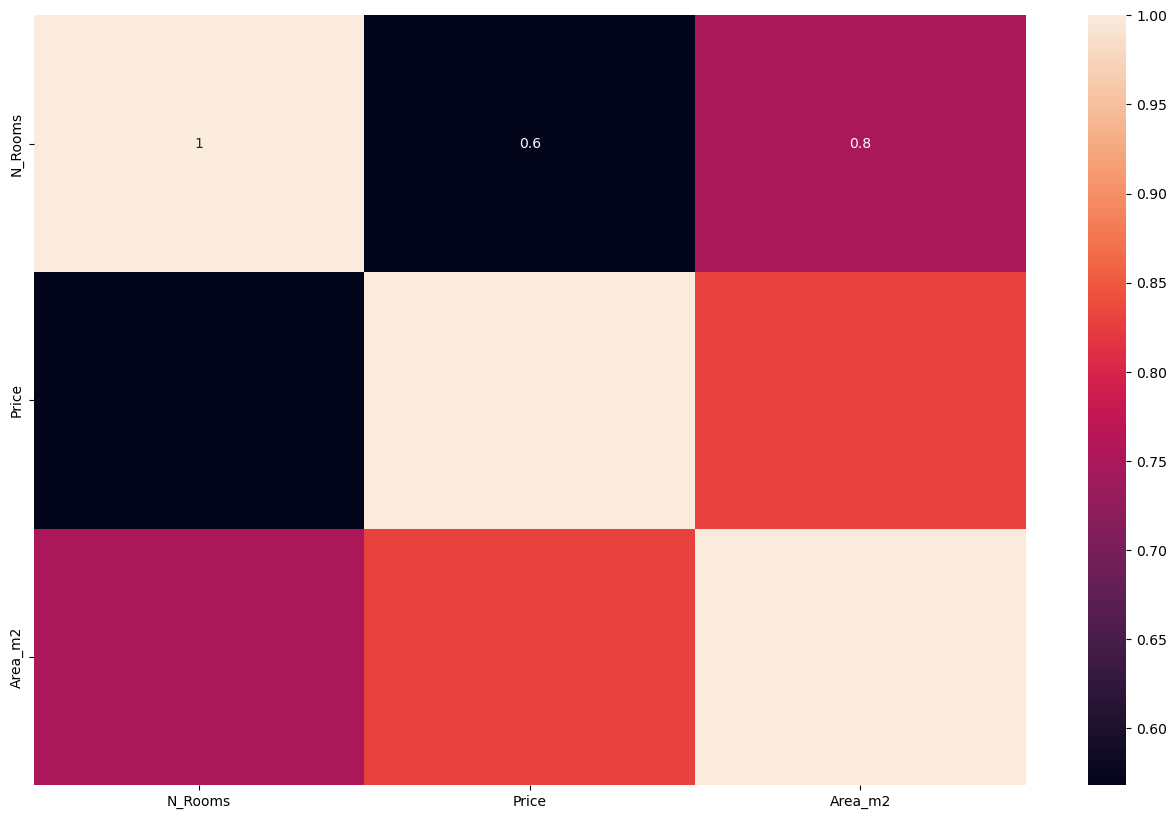

In [90]:
# Drop rows with non-numeric values
# create a new dataframe with just number on it - excluded the categorical values
# Pearson and do not work with binary variables
data_numeric = data.select_dtypes(include='number')

# Drop binary variables
# drop will work for row and columns - when axis = 0 (default) deletes lines
data_spearman = data_numeric

# Calculate correlation matrix
# method corr - correlaçao - pearson é o defult
# heatmap- annot = 1 we want to see the number, fmt we want to see the first significant figure
data_corr = data_spearman.corr(method='spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(data_corr, annot=True, fmt = '.1g')

plt.savefig('correlation_heatmap.png', dpi=200)

In [91]:
data_numeric.corr()

,N_Rooms,Price,Area_m2
N_Rooms,1.00,0.51,0.50
Price,0.51,1.00,0.70
Area_m2,0.50,0.70,1.00


In [92]:
data['Sqr_meter'] = data['Price']/data['Area_m2']
data

,N_Rooms,Price,Area_m2,Region,Typology,Type,Sqr_meter
id,,,,,,,
0,2,430000,90,Alvalade,T2,Apartamento,4777.78
1,1,269900,97,Benfica,T1,Apartamento,2782.47
2,3,399900,120,São_Domingos_de_Benfica,T3,Apartamento,3332.50
3,5,3950000,416,Santo_António,T5,Apartamento,9495.19
4,4,1650000,233,Misericórdia,T4+1,Apartamento,7081.55
...,...,...,...,...,...,...,...
1344,2,730200,77,Misericórdia,T2,Apartamento,9483.12
1345,2,479000,80,Estrela,T2,Apartamento,5987.50
1346,3,429900,72,São_Domingos_de_Benfica,T3,Apartamento,5970.83


In [93]:
# Calculate the average value per region
average_per_region = data.groupby('Region')['Sqr_meter'].mean()

print(average_per_region)

median_per_region = data.groupby('Region')['Sqr_meter'].median()

print(median_per_region)

Region
Ajuda                     6019.02
Alcântara                 7319.00
Alvalade                  5758.13
Areeiro                   5071.54
Arroios                   6028.40
Avenidas_Novas            7821.43
Beato                     3868.02
Belém                     7252.23
Benfica                   5047.82
Campo_de_Ourique          5900.60
Campolide                 7590.95
Carnide                   4885.58
Estrela                   7901.69
Lumiar                    6049.98
Marvila                   4496.38
Misericórdia              6890.50
Olivais                   4907.04
Parque_das_Nações         9519.53
Penha_de_França           4736.64
Santa_Clara               2638.15
Santa_Maria_Maior         7683.70
Santo_António             8388.07
São_Domingos_de_Benfica   5513.53
São_Vicente               5941.11
Name: Sqr_meter, dtype: float64
Region
Ajuda                      4437.50
Alcântara                  6956.52
Alvalade                   5169.71
Areeiro                    4914.6

In [94]:
average_per_type = data.groupby('Type')['Price'].agg(['mean', 'count'])

pd.options.display.float_format = '{:.2f}'.format

print(average_per_type)

                  mean  count
Type                         
Andar        520000.00      1
Apartamento  754919.06   1162
Casa         300000.00      3
Duplex       922513.04     23
Estúdio      277542.86      7
Flat         510000.00      1
Loft         770000.00      2
Moradia     1655152.78     36
Palacete    5800000.00      1
Penthouse   1873333.33      6
Quinta      7500000.00      1


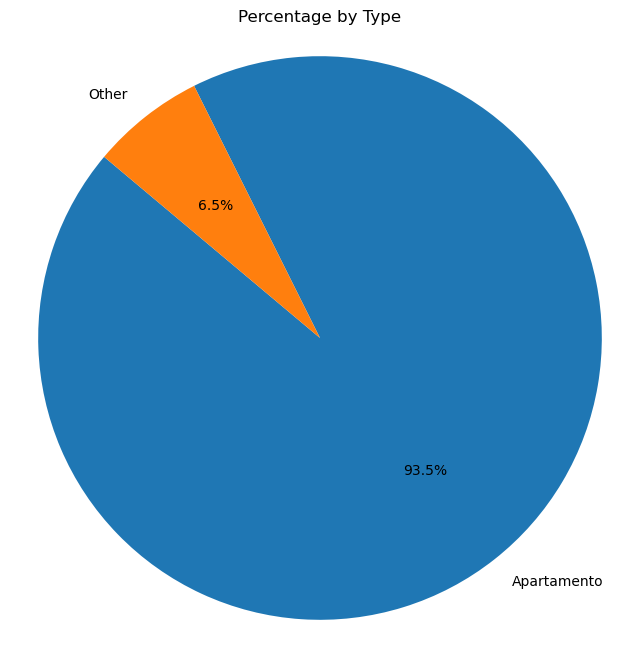

In [95]:
import matplotlib.pyplot as plt

average_per_type['Type'] = average_per_type.index
average_per_type['Grouped_Type'] = average_per_type['Type'].apply(lambda x: x if x == 'Apartamento' else 'Other')
grouped_counts = average_per_type.groupby('Grouped_Type')['count'].sum()

plt.figure(figsize=(8, 8))  # Set the figure size

labels = grouped_counts.index
sizes = grouped_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.axis('equal')


plt.title('Percentage by Type')

plt.savefig('type', dpi=200, bbox_inches='tight')

plt.show()

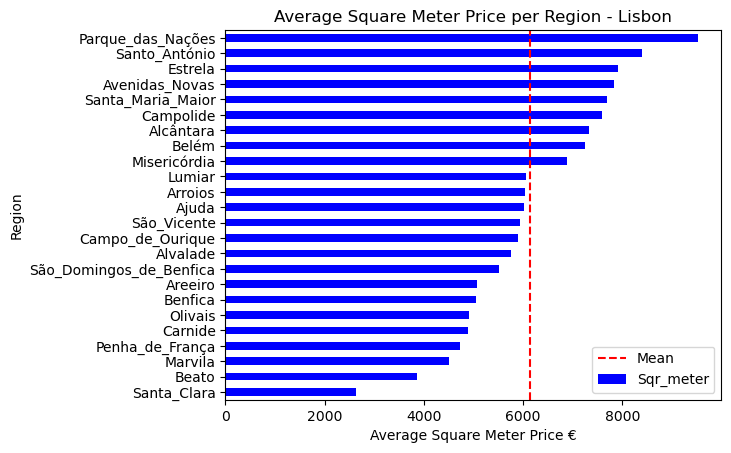

In [96]:
import matplotlib.pyplot as plt

average_per_region_sorted = average_per_region.sort_values(ascending=True)

average_per_region_sorted.plot(kind='barh', color='blue')
plt.axvline(x=average_per_region_sorted.mean(), color='red', linestyle='--', label='Mean')
plt.xlabel('Average Square Meter Price €')
plt.ylabel('Region')
plt.title('Average Square Meter Price per Region - Lisbon')
plt.legend()

plt.savefig('average_price_sqr_region.png', dpi=200, bbox_inches='tight')
plt.show()

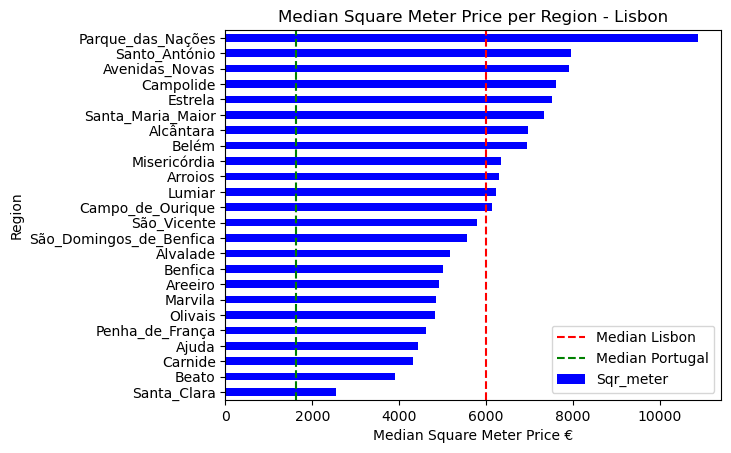

In [97]:
import matplotlib.pyplot as plt

median_per_region_sorted = median_per_region.sort_values(ascending=True)
median_portugal = 1619

median_per_region_sorted.plot(kind='barh', color='blue')
plt.axvline(x=median_per_region_sorted.mean(), color='red', linestyle='--', label='Median Lisbon')
plt.axvline(x=median_portugal, color='green', linestyle='--', label='Median Portugal')
plt.xlabel('Median Square Meter Price €')
plt.ylabel('Region')
plt.title('Median Square Meter Price per Region - Lisbon')
plt.legend()

plt.savefig('median_price_sqr_region.png', dpi=200, bbox_inches='tight')
plt.show()

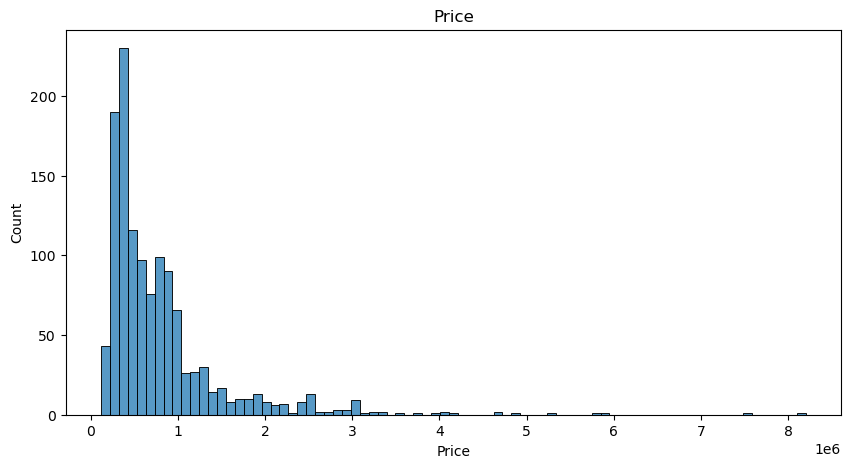

In [98]:
import seaborn as sns

plt.figure(figsize = (10,5))
sns.histplot(data=data, x="Price")
#sns.histplot(data=df_sample, x="total", stat="probability") # in relative frequency
plt.title("Price")
plt.show()

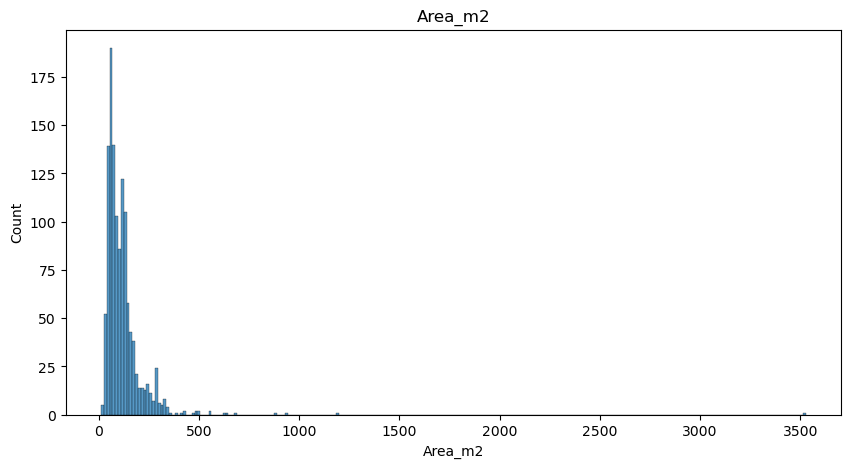

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize = (10,5))
sns.histplot(data=data, x="Area_m2")
#sns.histplot(data=df_sample, x="total", stat="probability") # in relative frequency
plt.title("Area_m2")
plt.show()

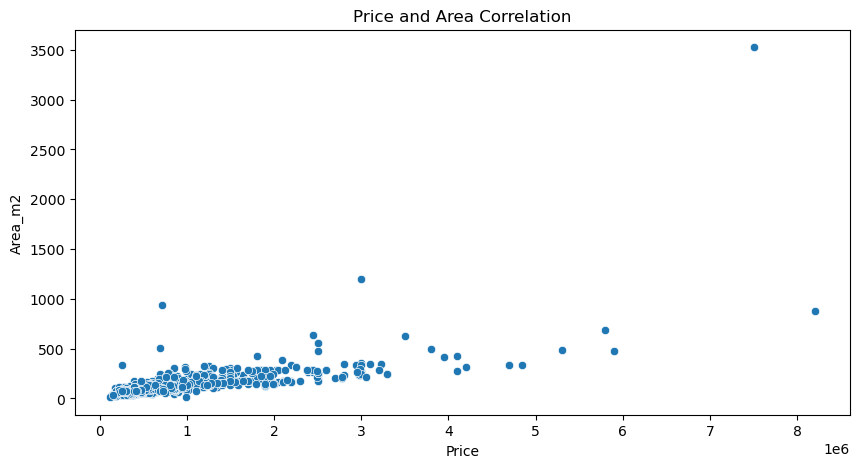

In [100]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=data, x="Price", y="Area_m2")
plt.title('Price and Area Correlation')
plt.show()

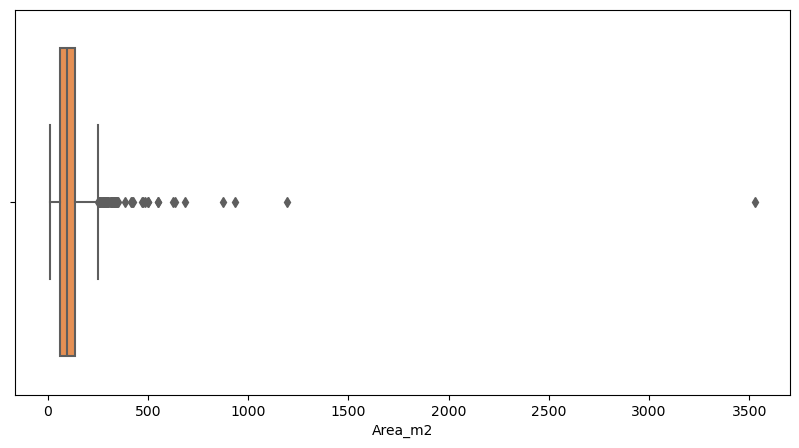

In [101]:
plt.figure(figsize = (10,5))
sns.boxplot(data=data, x="Area_m2", palette="Oranges")
plt.ylabel("")
plt.show()

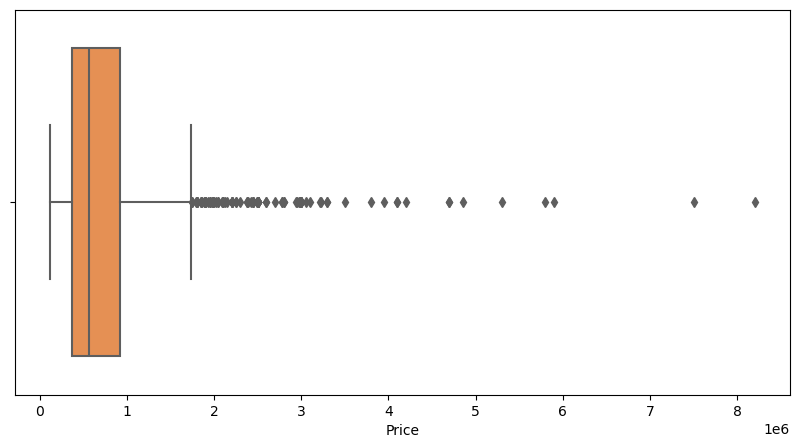

In [102]:
plt.figure(figsize = (10,5))
sns.boxplot(data=data, x="Price", palette="Oranges")
plt.ylabel("")
plt.show()

<Axes: xlabel='N_Rooms', ylabel='count'>

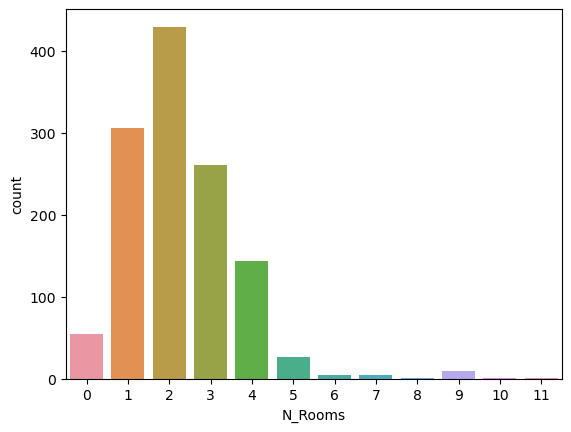

In [103]:
sns.countplot(x= 'N_Rooms', data = data)

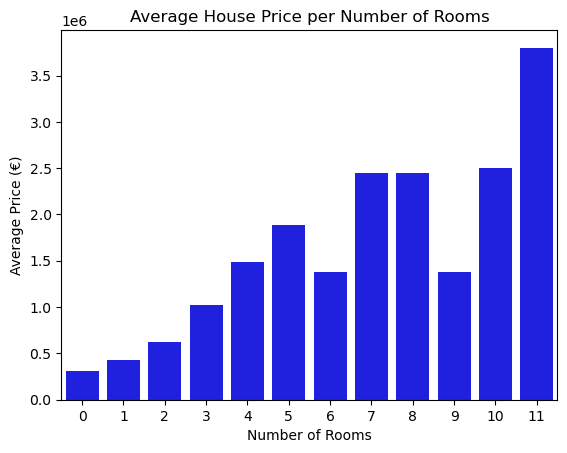

In [104]:
# Assuming 'data' is your DataFrame
# Calculate the average price per number of rooms
avg_price_per_room = data.groupby('N_Rooms')['Price'].mean().reset_index()

# Create the bar plot
ax = sns.barplot(x='N_Rooms', y='Price', data=avg_price_per_room, color='blue')

# Annotate each bar with the average price
#for p in ax.patches:
#    ax.annotate(f'€{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Set the title and labels
plt.title('Average House Price per Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Average Price (€)')

# Save the plot to a file
plt.savefig('average_price_per_room.png', dpi=200, bbox_inches='tight')

# Show the plot
plt.show()

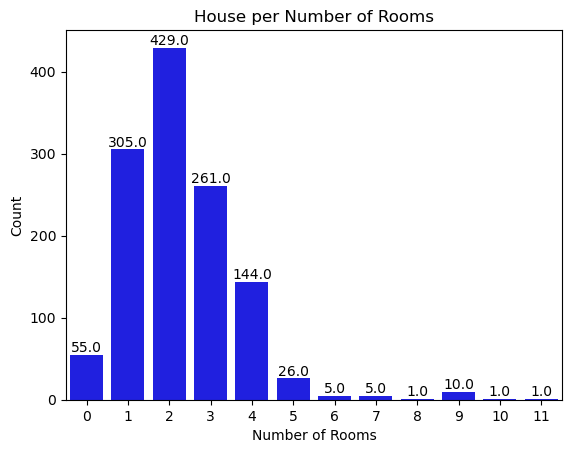

In [105]:
ax = sns.countplot(x='N_Rooms', data=data, color='blue')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

total_count = data['Price'].mean()

plt.title(f'House per Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Count')

plt.savefig('rooms_price.png', dpi=200, bbox_inches='tight')

# Show the plot
plt.show()

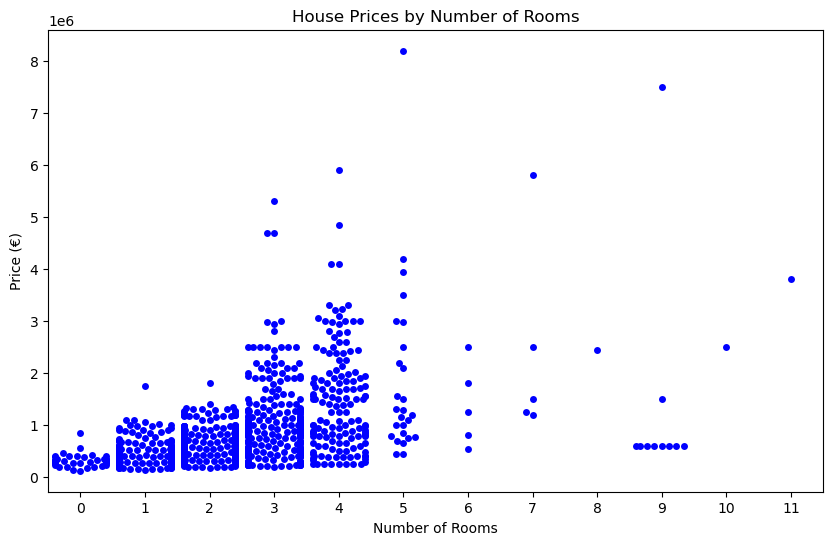

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Create the swarm plot
plt.figure(figsize=(10, 6))
ax = sns.swarmplot(x='N_Rooms', y='Price', data=data, color='blue')

# Set the title and labels
plt.title('House Prices by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price (€)')

# Save the plot to a file
plt.savefig('prices_by_rooms_swarmplot.png', dpi=200, bbox_inches='tight')

# Show the plot
plt.show()

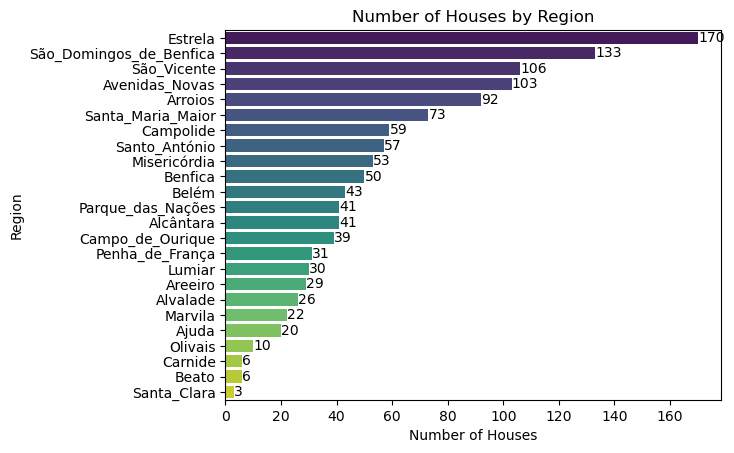

In [107]:
import matplotlib.pyplot as plt

region_counts = data['Region'].value_counts()

sorted_regions = region_counts.index.tolist()

sns.countplot(y='Region', data=data, order=sorted_regions, palette='viridis')

for i, count in enumerate(region_counts[sorted_regions]):
    plt.text(count + 0.1, i, str(count), va='center')

plt.xlabel('Number of Houses')
plt.ylabel('Region')
plt.title('Number of Houses by Region')

plt.savefig('houses_region.png', dpi=200, bbox_inches='tight')

# Show the plot
plt.show()

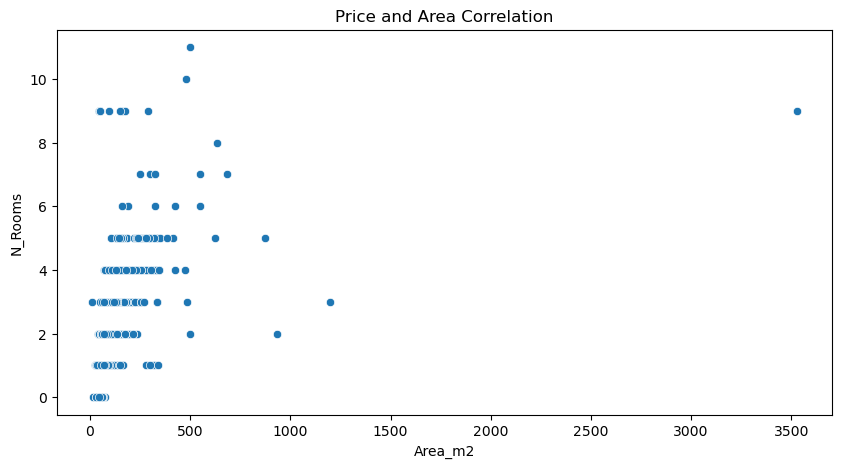

In [108]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=data, x="Area_m2", y="N_Rooms")
plt.title('Price and Area Correlation')
plt.show()

<Axes: xlabel='Area_m2', ylabel='Count'>

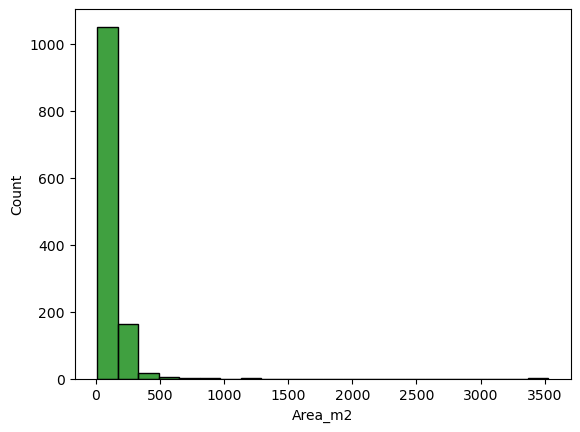

In [109]:
sns.histplot(data = data, x = 'Area_m2', color="g", bins='rice')

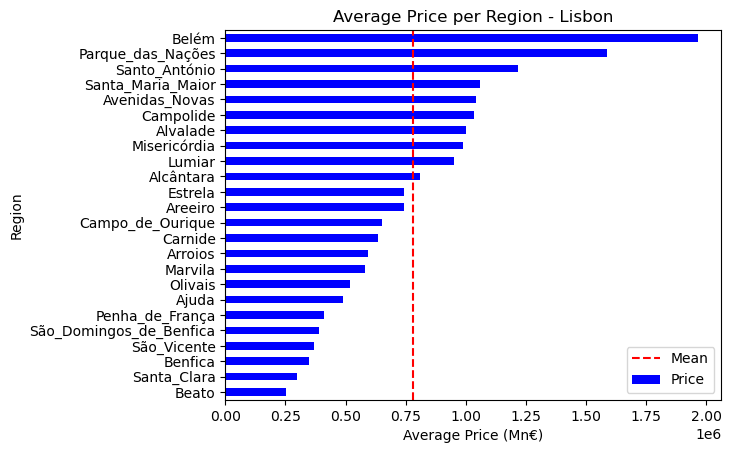

In [110]:
average_per_region_price = data.groupby('Region')['Price'].mean()

average_per_region_price_sorted = average_per_region_price.sort_values(ascending=True)

average_per_region_price_sorted.plot(kind='barh', color='blue')
plt.axvline(x=average_per_region_price_sorted.mean(), color='red', linestyle='--', label='Mean')
plt.xlabel('Average Price (Mn€)')
plt.ylabel('Region')
plt.title('Average Price per Region - Lisbon')
plt.legend()

plt.savefig('average_price_region.png', dpi=200, bbox_inches='tight')
plt.show()

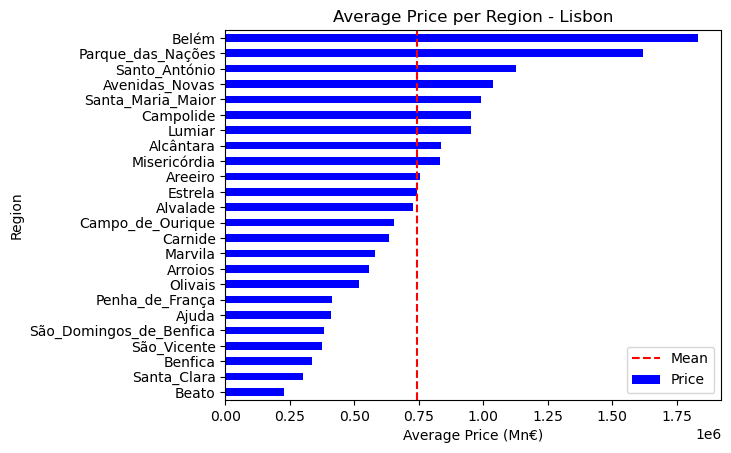

In [111]:
apartamento_data = data[data['Type'] == 'Apartamento']

average_per_region_apartamento = apartamento_data.groupby('Region')['Price'].mean()

average_per_region_sorted = average_per_region_apartamento.sort_values(ascending=True)

average_per_region_sorted.plot(kind='barh', color='blue')
plt.axvline(x=average_per_region_sorted.mean(), color='red', linestyle='--', label='Mean')
plt.xlabel('Average Price (Mn€)')
plt.ylabel('Region')
plt.title('Average Price per Region - Lisbon')
plt.legend()
plt.show()

In [112]:
apartamento_data

,N_Rooms,Price,Area_m2,Region,Typology,Type,Sqr_meter
id,,,,,,,
0,2,430000,90,Alvalade,T2,Apartamento,4777.78
1,1,269900,97,Benfica,T1,Apartamento,2782.47
2,3,399900,120,São_Domingos_de_Benfica,T3,Apartamento,3332.50
3,5,3950000,416,Santo_António,T5,Apartamento,9495.19
4,4,1650000,233,Misericórdia,T4+1,Apartamento,7081.55
...,...,...,...,...,...,...,...
1344,2,730200,77,Misericórdia,T2,Apartamento,9483.12
1345,2,479000,80,Estrela,T2,Apartamento,5987.50
1346,3,429900,72,São_Domingos_de_Benfica,T3,Apartamento,5970.83


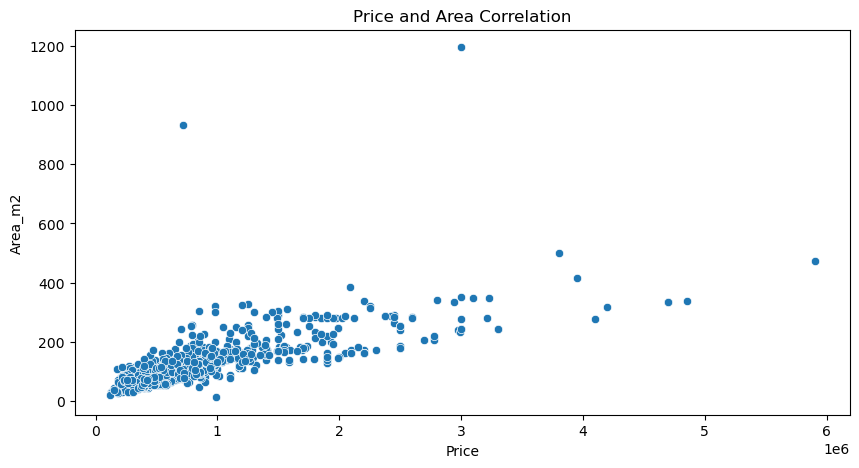

In [113]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=apartamento_data, x="Price", y="Area_m2")
plt.title('Price and Area Correlation')
plt.show()

<Axes: xlabel='Area_m2', ylabel='Count'>

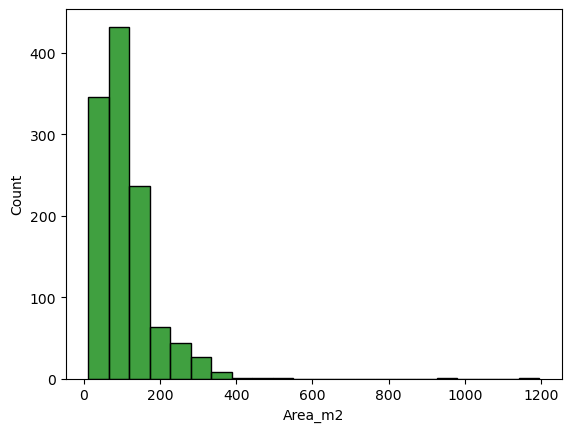

In [114]:
sns.histplot(data = apartamento_data, x = 'Area_m2', color="g", bins='rice')

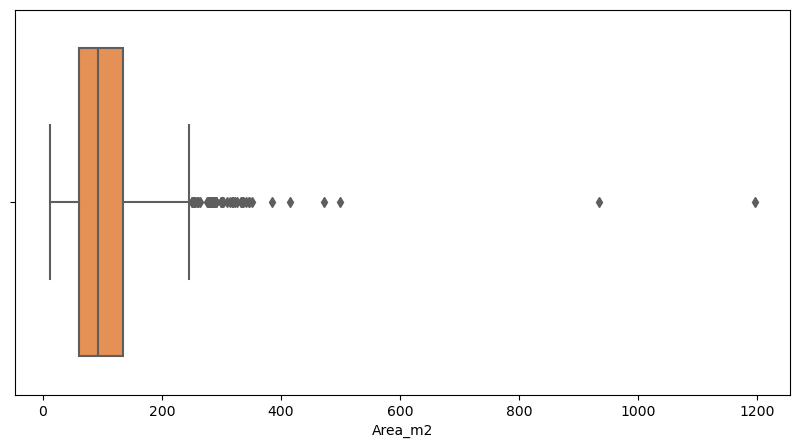

In [115]:
plt.figure(figsize = (10,5))
sns.boxplot(data=apartamento_data, x="Area_m2", palette="Oranges")
plt.ylabel("")
plt.show()

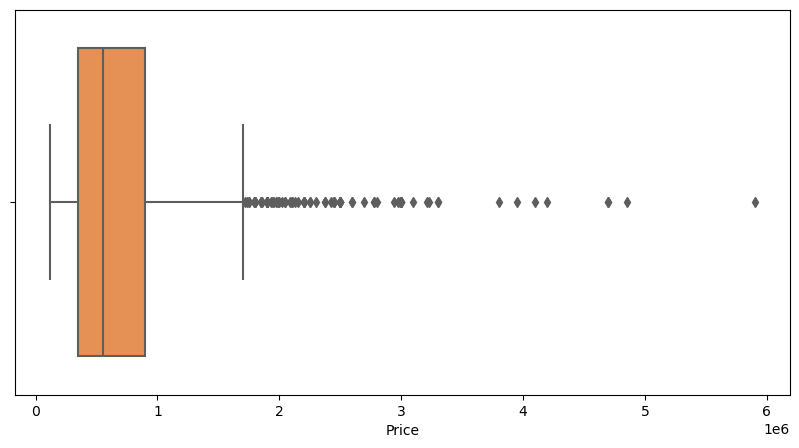

In [116]:
plt.figure(figsize = (10,5))
sns.boxplot(data=apartamento_data, x="Price", palette="Oranges")
plt.ylabel("")
plt.show()

In [117]:
selected_columns_carac = ['Último_andar', 'De_luxo', 'Com_elevador', 'Piscina', 'Com_garagem', 'Vista_para_mar', 'Price', 'Region']

# Create a new DataFrame with only the selected columns
data_carac = Lisbon_Properties[selected_columns_carac].copy()
data_carac

,Último_andar,De_luxo,Com_elevador,Piscina,Com_garagem,Vista_para_mar,Price,Region
id,,,,,,,,
0,0,0,0,0,0,0,430000,Alvalade
1,0,0,0,0,0,0,269900,Benfica
2,0,0,0,0,0,0,399900,São_Domingos_de_Benfica
3,0,0,0,0,0,0,3950000,Santo_António
4,0,0,0,0,0,0,1650000,Misericórdia
...,...,...,...,...,...,...,...,...
1344,0,0,0,0,0,0,730200,Misericórdia
1345,0,0,0,0,0,0,479000,Estrela
1346,0,0,0,0,0,0,429900,São_Domingos_de_Benfica


In [118]:
data_carac.groupby('Com_elevador')['Price'].mean()

Com_elevador
0   794828.67
Name: Price, dtype: float64

In [119]:
data_carac.groupby('Com_elevador').count()

,Último_andar,De_luxo,Piscina,Com_garagem,Vista_para_mar,Price,Region
Com_elevador,,,,,,,
0,1243,1243,1243,1243,1243,1243,1243


In [120]:
data_carac.groupby('Piscina')['Price'].mean()

Piscina
0    765936.57
1   1232337.66
Name: Price, dtype: float64

In [121]:
data_carac.groupby('Piscina').count()

,Último_andar,De_luxo,Com_elevador,Com_garagem,Vista_para_mar,Price,Region
Piscina,,,,,,,
0,1166,1166,1166,1166,1166,1166,1166
1,77,77,77,77,77,77,77


In [122]:
import geopandas as gpd
from geopandas import GeoDataFrame
from geopandas.tools import sjoin
from shapely.geometry import Point

import pandas as pd
import math

import zipfile
import requests
import io

import matplotlib.pyplot as plt
import matplotlib.cm as cmap
from matplotlib.colors import ListedColormap

In [123]:
# census data from Lisbon-PT
url = 'https://mapas.ine.pt/download/filesGPG/2021/municipios/BGRI2021_1106.zip'
filename = 'BGRI2021_1106.gpkg'

r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extract(filename)

# openlisbon shape
lisbon = gpd.read_file(filename)
print('size of the df: ', lisbon.shape)
lisbon.iloc[[0,1,2], [0,1,-1]]

size of the df:  (2822, 48)


,OBJECTID,BGRI2021,geometry
0,30243,11065602301,"MULTIPOLYGON (((-86809.545 -103264.238, -86801..."
1,30244,11065700203,"MULTIPOLYGON (((-88183.921 -103236.850, -88218..."
2,30311,11065801011,"MULTIPOLYGON (((-94424.359 -107038.246, -94495..."


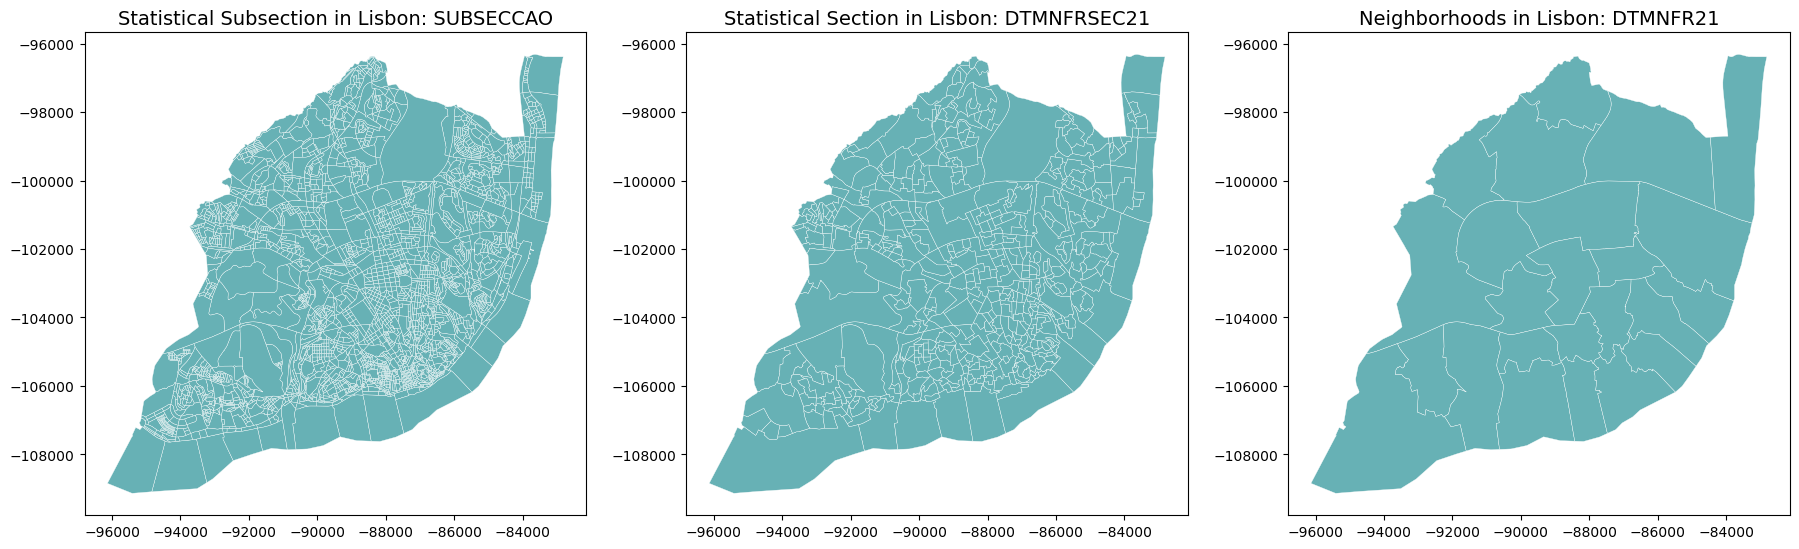

In [124]:
# select only numerical columns of census data
census_col = [x for x in lisbon.columns.to_list() if x.startswith('N_')]

# union on statistical section
lisbon_statistical_section = lisbon[census_col + ['DTMNFRSEC21', 'geometry']].dissolve(by='DTMNFRSEC21', aggfunc='sum').reset_index()

# union on neighborhood
lisbon_neighborhood = lisbon[census_col + ['DTMNFR21', 'geometry']].dissolve(by='DTMNFR21', aggfunc='sum').reset_index()

############################
# plot the maps
fig, ax = plt.subplots(1, 3, figsize=(22, 12))

# SUBSECCAO map
lisbon.plot(aspect=1,
            edgecolor="white",
            linewidth=0.25,
            color='#67B1B5',
            ax=ax[0])
ax[0].set_title('Statistical Subsection in Lisbon: SUBSECCAO', fontsize=14)

# DTMNFRSEC21 map
lisbon_statistical_section.plot(aspect=1,
                                edgecolor="white",
                                linewidth=0.25,
                                color='#67B1B5',
                                ax=ax[1])
ax[1].set_title('Statistical Section in Lisbon: DTMNFRSEC21', fontsize=14)

# DTMNFR21 map
lisbon_neighborhood.plot(aspect=1,
                         edgecolor="white",
                         linewidth=0.25,
                         color='#67B1B5',
                         ax=ax[2])
ax[2].set_title('Neighborhoods in Lisbon: DTMNFR21', fontsize=14);

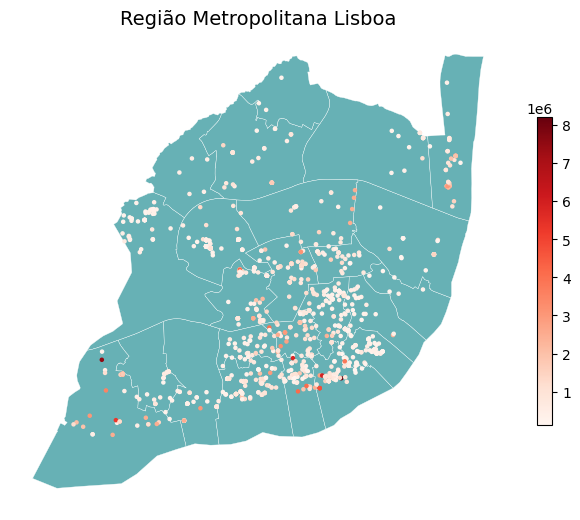

In [125]:
import requests
import zipfile
import io
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# URL of the census data for Lisbon
url = 'https://mapas.ine.pt/download/filesGPG/2021/municipios/BGRI2021_1106.zip'
filename = 'BGRI2021_1106.gpkg'

# Download and extract the zip file
r = requests.get(url)
r.raise_for_status()  # Check if the request was successful
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()  # Extract all contents of the zip file

# Open the extracted GeoPackage file
lisbon = gpd.read_file(filename)

# Select only numerical columns of census data
census_col = [x for x in lisbon.columns.to_list() if x.startswith('N_')]

# Union on statistical section
lisbon_statistical_section = lisbon[census_col + ['DTMNFRSEC21', 'geometry']].dissolve(by='DTMNFRSEC21', aggfunc='sum').reset_index()

# Union on neighborhood
lisbon_neighborhood = lisbon[census_col + ['DTMNFR21', 'geometry']].dissolve(by='DTMNFR21', aggfunc='sum').reset_index()

# Sample DataFrame with latitude and longitude

# Convert latitude and longitude to Point geometries
data_1['geometry'] = data_1.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

# Create a GeoDataFrame with the points in EPSG:4326
points_gdf = gpd.GeoDataFrame(data_1, geometry='geometry', crs="EPSG:4326")

# Transform the points to the same CRS as Lisbon data (EPSG:3763)
points_gdf = points_gdf.to_crs(epsg=3763)

# Plot the map with neighborhoods and points
fig, ax = plt.subplots(figsize=(8, 8))

# DTMNFR21 map

# Plot neighborhoods
lisbon_neighborhood.plot(aspect=1,
                         edgecolor="white",
                         linewidth=0.25,
                         color='#67B1B5',
                         ax=ax)

# Plot points with color by price
points_gdf.plot(ax=ax, column='Price', cmap='Reds',legend_kwds={'shrink': 0.5},markersize=5, legend=True)

# Set title
ax.set_title('Região Metropolitana Lisboa', fontsize=14)

# Remove axis
ax.axis('off')

plt.show()

In [126]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1243 entries, 0 to 1348
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N_Rooms    1243 non-null   int64  
 1   Price      1243 non-null   int64  
 2   Area_m2    1243 non-null   int64  
 3   Region     1243 non-null   object 
 4   Typology   1243 non-null   object 
 5   Type       1243 non-null   object 
 6   Latitude   1243 non-null   float64
 7   Longitude  1243 non-null   float64
 8   geometry   1243 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 97.1+ KB


In [127]:
lisbon_neighborhood

,DTMNFR21,geometry,N_EDIFICIOS_CLASSICOS,N_EDIFICIOS_CLASS_CONST_1_OU_2_ALOJ,N_EDIFICIOS_CLASS_CONST_3_OU_MAIS_ALOJAMENTOS,N_EDIFICIOS_EXCLUSIV_RESID,N_EDIFICIOS_1_OU_2_PISOS,N_EDIFICIOS_3_OU_MAIS_PISOS,N_EDIFICIOS_CONSTR_ANTES_1945,N_EDIFICIOS_CONSTR_1946_1980,...,N_ADP_3_OU_MAIS_PESSOAS,N_NUCLEOS_FAMILIARES,N_NUCLEOS_FAMILIARES_COM_FILHOS_TENDO_O_MAIS_NOVO_MENOS_DE_25,N_INDIVIDUOS,N_INDIVIDUOS_H,N_INDIVIDUOS_M,N_INDIVIDUOS_0_14,N_INDIVIDUOS_15_24,N_INDIVIDUOS_25_64,N_INDIVIDUOS_65_OU_MAIS
0,110601,"POLYGON ((-92109.696 -106814.132, -92111.758 -...",2716.00,1862.00,848.00,2635.00,1896.00,820.00,1018.00,1398.00,...,2021.00,4038.00,1746.00,14306.00,6566.00,7740.00,1796.00,1268.00,7323.00,3919.00
1,110602,"POLYGON ((-90877.013 -107866.827, -91338.243 -...",1493.00,475.00,1013.00,1366.00,578.00,915.00,729.00,607.00,...,1836.00,3714.00,1712.00,13850.00,6269.00,7581.00,1774.00,1235.00,7500.00,3341.00
2,110607,"POLYGON ((-84415.593 -103223.809, -84408.713 -...",1730.00,1033.00,694.00,1673.00,1046.00,684.00,628.00,937.00,...,1654.00,3380.00,1420.00,12183.00,5786.00,6397.00,1351.00,1148.00,6542.00,3142.00
3,110608,"POLYGON ((-91172.782 -102927.312, -91172.762 -...",2493.00,1074.00,1407.00,2274.00,1050.00,1443.00,91.00,1909.00,...,4782.00,10027.00,4280.00,35362.00,15808.00,19554.00,4101.00,3193.00,17593.00,10475.00
4,110610,"POLYGON ((-89860.454 -104416.875, -89915.965 -...",2255.00,1413.00,828.00,2164.00,1467.00,788.00,787.00,1159.00,...,1948.00,3839.00,1760.00,14787.00,6989.00,7798.00,1702.00,1413.00,8077.00,3595.00
5,110611,"POLYGON ((-90873.413 -100306.936, -90839.263 -...",1383.00,845.00,528.00,1326.00,862.00,521.00,174.00,641.00,...,2803.00,5112.00,2513.00,18028.00,8350.00,9678.00,2462.00,2008.00,9289.00,4269.00
6,110618,"POLYGON ((-89810.267 -100632.385, -89855.091 -...",1900.00,573.00,1306.00,1714.00,466.00,1434.00,123.00,647.00,...,7271.00,12900.00,6731.00,46334.00,21521.00,24813.00,6790.00,5154.00,24701.00,9689.00
7,110621,"POLYGON ((-84074.710 -100952.147, -84055.934 -...",1490.00,442.00,1033.00,1426.00,605.00,885.00,292.00,646.00,...,5879.00,10548.00,4802.00,35479.00,16598.00,18881.00,4698.00,3751.00,18489.00,8541.00
8,110633,"POLYGON ((-84591.806 -100748.619, -84676.557 -...",2741.00,1630.00,1096.00,2612.00,1206.00,1535.00,203.00,1990.00,...,4930.00,9171.00,4145.00,32179.00,14917.00,17262.00,3865.00,3266.00,16494.00,8554.00
9,110639,"POLYGON ((-90542.664 -103100.050, -90548.143 -...",1726.00,309.00,1379.00,1484.00,329.00,1397.00,257.00,1037.00,...,4708.00,9368.00,4291.00,34076.00,15423.00,18653.00,4057.00,3463.00,17560.00,8996.00


In [128]:
Lisbon_Culture = pd.read_csv(r'C:\Users\rgpoi\OneDrive\Ambiente de Trabalho\Ficheiros_Projeto_Python\Lisbon_Culture.csv', index_col=0)
Lisbon_Culture

,INF_NOME,FREGUESIA,GlobalID,Type,latitude,longitude
OBJECTID,,,,,,
1,Museu de Arte Popular,Belém,4188e21c-373e-429e-b209-95c8ec28a34c,Museum,38.69,-9.21
3,Museu Coleção Berardo,Belém,e9b18708-da7a-4c91-87b4-dc1a4646a55b,Museum,38.70,-9.21
4,"MAAT - Museu de Arte, Arquitetura e Tecnologia",Belém,d30df7a4-89fd-4570-a5e2-aca9fdff84f8,Museum,38.70,-9.19
5,Museu Nacional dos Coches,Belém,be5d44a3-dd01-4258-a3ae-c3b73e74e446,Museum,38.70,-9.20
6,Museu de Marinha,Belém,658ca5c9-bc5b-49c7-ba5b-18659c32036b,Museum,38.70,-9.21
...,...,...,...,...,...,...
187,Biblioteca do Instituto Geográfico do Exército,Olivais,be84c7eb-c741-4d01-8984-3cedaf5ca3b0,Auditorium,38.78,-9.11
188,Biblioteca e Centro de Documentação Inst. Supe...,Santa Clara,e91afddc-eb55-48c8-b161-aa3af24a899a,Auditorium,38.78,-9.16
189,Biblioteca de Alcântara,Alcântara,c17f8533-2f77-474b-9347-9b1d84ccf65d,Auditorium,38.71,-9.18


In [129]:
Lisbon_Culture['FREGUESIA'].value_counts()

FREGUESIA
Santa Maria Maior          40
Belém                      27
Avenidas Novas             26
Alvalade                   26
Santo António              25
Estrela                    23
Misericórdia               22
Arroios                    17
São Domingos de Benfica    13
Lumiar                     11
Campo de Ourique            9
Ajuda                       9
Alcântara                   9
Campolide                   8
Carnide                     6
Marvila                     6
Areeiro                     6
São Vicente                 5
Parque das Nações           4
Benfica                     4
Penha de França             4
Beato                       3
Olivais                     3
Santa Clara                 1
Name: count, dtype: int64

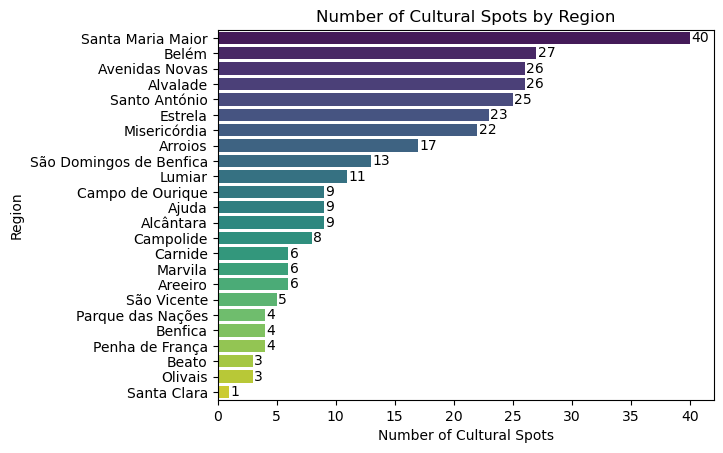

In [130]:
import matplotlib.pyplot as plt

region_counts_1 = Lisbon_Culture['FREGUESIA'].value_counts()

sorted_regions_1 = region_counts_1.index.tolist()

sns.countplot(y='FREGUESIA', data=Lisbon_Culture, order=sorted_regions_1, palette='viridis')

for i, count in enumerate(region_counts_1[sorted_regions_1]):
    plt.text(count + 0.1, i, str(count), va='center')

plt.xlabel('Number of Cultural Spots')
plt.ylabel('Region')
plt.title('Number of Cultural Spots by Region')

plt.savefig('culture_region.png', dpi=200, bbox_inches='tight')

# Show the plot
plt.show()

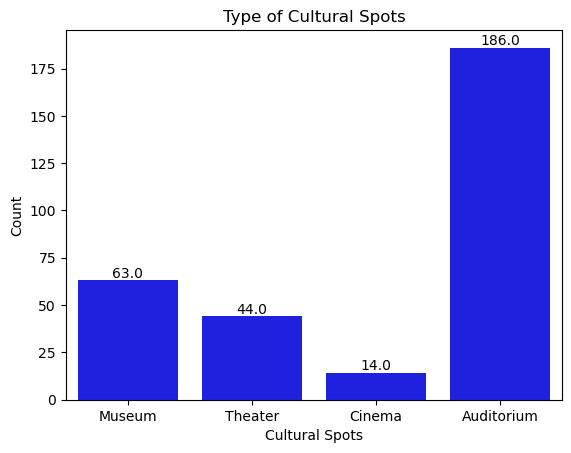

In [131]:


ax = sns.countplot(x='Type', data=Lisbon_Culture, color='blue')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

total_count_1 = Lisbon_Culture['Type'].count()

plt.title(f'Type of Cultural Spots')
plt.xlabel('Cultural Spots')
plt.ylabel('Count')

plt.savefig('cultural_count.png', dpi=200, bbox_inches='tight')

# Show the plot
plt.show()

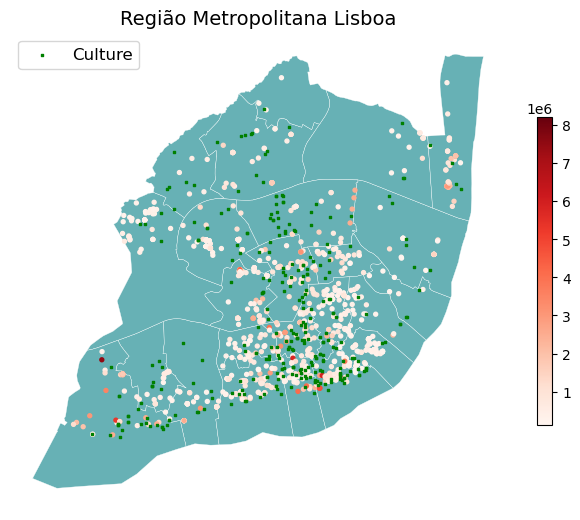

In [132]:
import requests
import zipfile
import io
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# URL of the census data for Lisbon
url = 'https://mapas.ine.pt/download/filesGPG/2021/municipios/BGRI2021_1106.zip'
filename = 'BGRI2021_1106.gpkg'

# Download and extract the zip file
r = requests.get(url)
r.raise_for_status()  # Check if the request was successful
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()  # Extract all contents of the zip file

# Open the extracted GeoPackage file
lisbon = gpd.read_file(filename)

# Select only numerical columns of census data
census_col = [x for x in lisbon.columns.to_list() if x.startswith('N_')]

# Union on statistical section
lisbon_statistical_section = lisbon[census_col + ['DTMNFRSEC21', 'geometry']].dissolve(by='DTMNFRSEC21', aggfunc='sum').reset_index()

# Union on neighborhood
lisbon_neighborhood = lisbon[census_col + ['DTMNFR21', 'geometry']].dissolve(by='DTMNFR21', aggfunc='sum').reset_index()

# Sample DataFrame with latitude and longitude

# Convert latitude and longitude to Point geometries
data_1['geometry'] = data_1.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

# Create a GeoDataFrame with the points in EPSG:4326
points_gdf = gpd.GeoDataFrame(data_1, geometry='geometry', crs="EPSG:4326")

# Transform the points to the same CRS as Lisbon data (EPSG:3763)
points_gdf = points_gdf.to_crs(epsg=3763)

Lisbon_Culture['geometry'] = Lisbon_Culture.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Create a GeoDataFrame for the second dataset
points_gdf_2 = gpd.GeoDataFrame(Lisbon_Culture, geometry='geometry', crs="EPSG:4326")

# Transform the points to the same CRS as Lisbon data (EPSG:3763)
points_gdf_2 = points_gdf_2.to_crs(epsg=3763)

# Plot the map with neighborhoods and points
fig, ax = plt.subplots(figsize=(8, 8))

# DTMNFR21 map

# Plot neighborhoods
lisbon_neighborhood.plot(aspect=1,
                         edgecolor="white",
                         linewidth=0.25,
                         color='#67B1B5',
                         ax=ax)

# Plot points with color by price
points_gdf.plot(ax=ax, column='Price', cmap='Reds',legend_kwds={'shrink': 0.5},markersize=8, legend=True)

# Plot points for the second dataset
points_gdf_2.plot(ax=ax, color='green', marker='s', markersize=1, label='Culture')

# Set title
ax.set_title('Região Metropolitana Lisboa', fontsize=14)

# Add legend
ax.legend(loc='upper left', fontsize=12)

# Remove axis
ax.axis('off')

plt.show()

In [133]:
Lisbon_Culture

,INF_NOME,FREGUESIA,GlobalID,Type,latitude,longitude,geometry
OBJECTID,,,,,,,
1,Museu de Arte Popular,Belém,4188e21c-373e-429e-b209-95c8ec28a34c,Museum,38.69,-9.21,POINT (-9.208446254141791 38.6938036001826)
3,Museu Coleção Berardo,Belém,e9b18708-da7a-4c91-87b4-dc1a4646a55b,Museum,38.70,-9.21,POINT (-9.207731660840221 38.6957476923844)
4,"MAAT - Museu de Arte, Arquitetura e Tecnologia",Belém,d30df7a4-89fd-4570-a5e2-aca9fdff84f8,Museum,38.70,-9.19,POINT (-9.19371529028373 38.6960435304729)
5,Museu Nacional dos Coches,Belém,be5d44a3-dd01-4258-a3ae-c3b73e74e446,Museum,38.70,-9.20,POINT (-9.198386801678771 38.6968006044798)
6,Museu de Marinha,Belém,658ca5c9-bc5b-49c7-ba5b-18659c32036b,Museum,38.70,-9.21,POINT (-9.20923637432389 38.6972269914078)
...,...,...,...,...,...,...,...
187,Biblioteca do Instituto Geográfico do Exército,Olivais,be84c7eb-c741-4d01-8984-3cedaf5ca3b0,Auditorium,38.78,-9.11,POINT (-9.113869883819801 38.7783584745839)
188,Biblioteca e Centro de Documentação Inst. Supe...,Santa Clara,e91afddc-eb55-48c8-b161-aa3af24a899a,Auditorium,38.78,-9.16,POINT (-9.16080135013299 38.7815528453781)
189,Biblioteca de Alcântara,Alcântara,c17f8533-2f77-474b-9347-9b1d84ccf65d,Auditorium,38.71,-9.18,POINT (-9.17783766528358 38.7064003129323)


In [134]:
data_1

,N_Rooms,Price,Area_m2,Region,Typology,Type,Latitude,Longitude,geometry
id,,,,,,,,,
0,2,430000,90,Alvalade,T2,Apartamento,38.75,-9.14,POINT (-9.1425898 38.7457392)
1,1,269900,97,Benfica,T1,Apartamento,38.75,-9.20,POINT (-9.200900000000001 38.75171)
2,3,399900,120,São_Domingos_de_Benfica,T3,Apartamento,38.75,-9.18,POINT (-9.17989 38.74657)
3,5,3950000,416,Santo_António,T5,Apartamento,38.72,-9.16,POINT (-9.1581178942 38.7234746455)
4,4,1650000,233,Misericórdia,T4+1,Apartamento,38.71,-9.14,POINT (-9.144679999999999 38.70794)
...,...,...,...,...,...,...,...,...,...
1344,2,730200,77,Misericórdia,T2,Apartamento,38.71,-9.15,POINT (-9.146667528 38.7124245)
1345,2,479000,80,Estrela,T2,Apartamento,38.71,-9.17,POINT (-9.16705 38.70581)
1346,3,429900,72,São_Domingos_de_Benfica,T3,Apartamento,38.74,-9.18,POINT (-9.1840875 38.7448996)


In [135]:
Lisbon_Education = pd.read_csv(r'C:\Users\rgpoi\OneDrive\Ambiente de Trabalho\Ficheiros_Projeto_Python\Lisbon_Education.csv', index_col=0)
Lisbon_Education

,Area,GlobalID,geometry,Access,Stage,latitude,longitude
Name,,,,,,,
Escola Profissional Metropolitana de Lisboa,Alcântara,707e37d5-e1b5-45fc-85f8-cc7095308431,POINT (-9.181589977153561 38.699297532228),Public,Pre-School,38.70,-9.18
Conservatório Metropolitano de Música de Lisboa,Alcântara,83edfbca-6558-460e-93d1-0475467960a1,POINT (-9.1813018524282 38.6993993202234),Public,Pre-School,38.70,-9.18
Academia de Música de Luisboa - Os Violinos,Belém,a421d20f-eb13-4126-a30c-2158b07fe2fd,POINT (-9.1944372593028 38.7001317342682),Public,Pre-School,38.70,-9.19
Acordarte - Academia de Música de Lisboa,Belém,24aa8435-1660-4cdd-a993-5113daefd230,POINT (-9.1944372593028 38.7001317342682),Public,Pre-School,38.70,-9.19
Escola Profissional de Imagem (ETIC),Misericórdia,049de07d-4405-4a0f-8946-4ddce0c71d28,POINT (-9.147457132489089 38.7078031160822),Public,Pre-School,38.71,-9.15
...,...,...,...,...,...,...,...
ue | Universidade Europeia - FCSD (Faculdade de Ciências da Saúde e do Desporto),NaN,bd396f8b-c726-4df0-aa96-b6714df4c562,POINT (-9.18365790945365 38.7650161641021),All,Uni,38.77,-9.18
ue | Universidade Europeia - FCES (Faculdade de Ciências Empresariais e Sociais),NaN,fd0bce17-613a-4c5a-96a6-b55b17478aa9,POINT (-9.193682695697721 38.7600490654187),All,Uni,38.76,-9.19
UNL | NOVA IMS - NOVA Information Management School,NaN,4515c8c1-81ec-4ba6-be95-79b575a776c7,POINT (-9.160302545703111 38.7325791296909),All,Uni,38.73,-9.16


In [136]:
Lisbon_Education['Stage'].value_counts()

Stage
First         179
Uni            85
Pre-School     36
Name: count, dtype: int64

In [137]:
Lisbon_Education['Area'].value_counts()

Area
Alvalade                   20
Belém                      20
Lumiar                     17
Olivais                    14
Marvila                    12
São Domingos de Benfica    11
Campo de Ourique           11
Arroios                    11
Benfica                    11
Avenidas Novas              9
Santa Maria Maior           8
Santa Clara                 8
Penha de França             8
Carnide                     8
Alcântara                   7
Parque das Nações           7
Estrela                     7
Ajuda                       6
São Vicente                 5
Santo António               3
Campolide                   3
Areeiro                     3
Misericórdia                3
Beato                       3
Name: count, dtype: int64

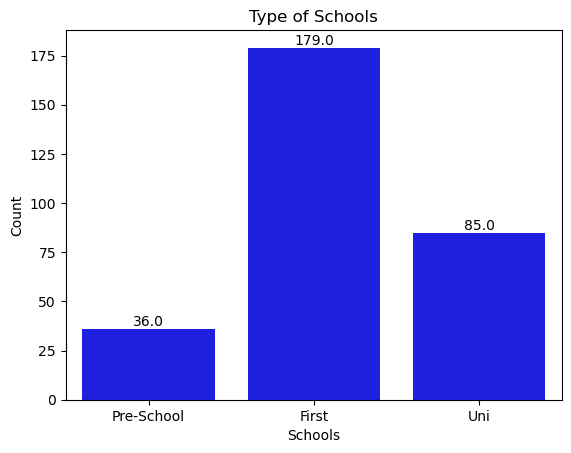

In [138]:
ax = sns.countplot(x='Stage', data=Lisbon_Education, color='blue')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

total_count_3 = Lisbon_Education['Stage'].count()

plt.title(f'Type of Schools')
plt.xlabel('Schools')
plt.ylabel('Count')

plt.savefig('schools_count.png', dpi=200, bbox_inches='tight')

# Show the plot
plt.show()

In [139]:
Lisbon_Education.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, Escola Profissional Metropolitana de Lisboa to UNL | NOVA SBE - NOVA School of Business and Economics
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       215 non-null    object 
 1   GlobalID   300 non-null    object 
 2   geometry   300 non-null    object 
 3   Access     300 non-null    object 
 4   Stage      300 non-null    object 
 5   latitude   300 non-null    float64
 6   longitude  300 non-null    float64
dtypes: float64(2), object(5)
memory usage: 26.9+ KB


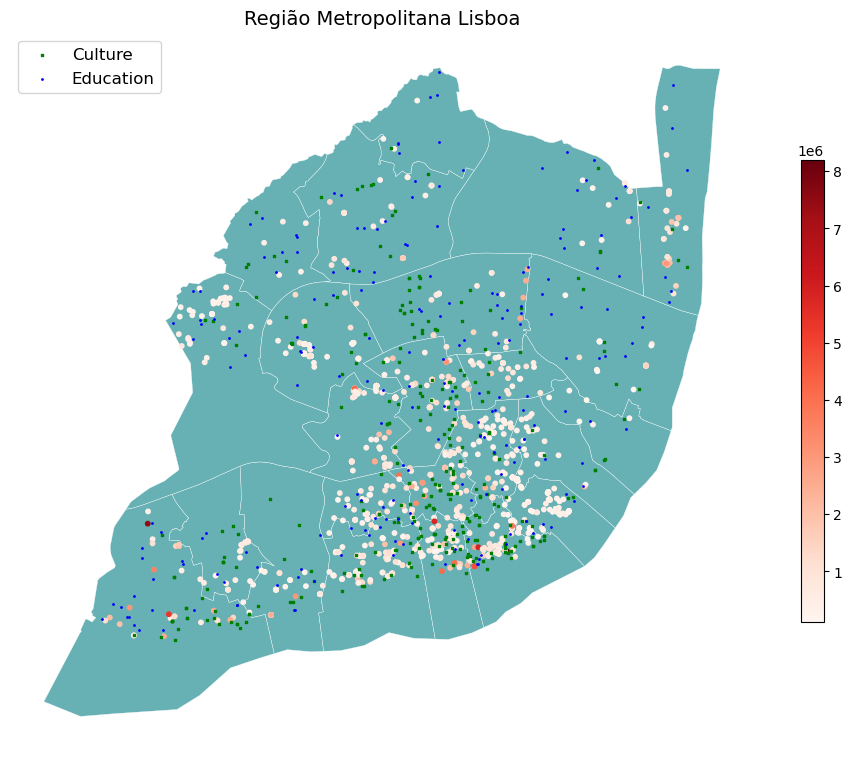

In [140]:
import requests
import zipfile
import io
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# URL of the census data for Lisbon
url = 'https://mapas.ine.pt/download/filesGPG/2021/municipios/BGRI2021_1106.zip'
filename = 'BGRI2021_1106.gpkg'

# Download and extract the zip file
r = requests.get(url)
r.raise_for_status()  # Check if the request was successful
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()  # Extract all contents of the zip file

# Open the extracted GeoPackage file
lisbon = gpd.read_file(filename)

# Select only numerical columns of census data
census_col = [x for x in lisbon.columns.to_list() if x.startswith('N_')]

# Union on statistical section
lisbon_statistical_section = lisbon[census_col + ['DTMNFRSEC21', 'geometry']].dissolve(by='DTMNFRSEC21', aggfunc='sum').reset_index()

# Union on neighborhood
lisbon_neighborhood = lisbon[census_col + ['DTMNFR21', 'geometry']].dissolve(by='DTMNFR21', aggfunc='sum').reset_index()

# Sample DataFrame with latitude and longitude

# Convert latitude and longitude to Point geometries
data_1['geometry'] = data_1.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

# Create a GeoDataFrame with the points in EPSG:4326
points_gdf = gpd.GeoDataFrame(data_1, geometry='geometry', crs="EPSG:4326")

# Transform the points to the same CRS as Lisbon data (EPSG:3763)
points_gdf = points_gdf.to_crs(epsg=3763)

Lisbon_Culture['geometry'] = Lisbon_Culture.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Create a GeoDataFrame for the second dataset
points_gdf_2 = gpd.GeoDataFrame(Lisbon_Culture, geometry='geometry', crs="EPSG:4326")

# Transform the points to the same CRS as Lisbon data (EPSG:3763)
points_gdf_2 = points_gdf_2.to_crs(epsg=3763)

#titrar os nulls da area

Lisbon_Education_1 = Lisbon_Education.dropna(subset=['Area'])

Lisbon_Education_1['geometry'] = Lisbon_Education_1.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Create a GeoDataFrame for the second dataset
points_gdf_3 = gpd.GeoDataFrame(Lisbon_Education_1, geometry='geometry', crs="EPSG:4326")

# Transform the points to the same CRS as Lisbon data (EPSG:3763)
points_gdf_3 = points_gdf_3.to_crs(epsg=3763)



# Plot the map with neighborhoods and points
fig, ax = plt.subplots(figsize=(12, 12))

# DTMNFR21 map

# Plot neighborhoods
lisbon_neighborhood.plot(aspect=1,
                         edgecolor="white",
                         linewidth=0.25,
                         color='#67B1B5',
                         ax=ax)

# Plot points with color by price
points_gdf.plot(ax=ax, column='Price', cmap='Reds',legend_kwds={'shrink': 0.5},markersize=10, legend=True)

# Plot points for the second dataset
points_gdf_2.plot(ax=ax, color='green', marker='s', markersize=1, label='Culture')

# Plot points for the third dataset
points_gdf_3.plot(ax=ax, color='blue', marker='o', markersize=1, label='Education')

# Set title
ax.set_title('Região Metropolitana Lisboa', fontsize=14)

# Add legend
ax.legend(loc='upper left', fontsize=12)

# Remove axis
ax.axis('off')

plt.savefig('Distribution_all', dpi=200, bbox_inches='tight')

plt.show()